
<img src="../Resources/Images/Slides-Logo.png" alt="Drawing" style="width: 400px;"/>

<center> <a href='https://www.linkedin.com/in/raulm8/'>by Raul Maldonado</a></center>

# 1.0 The Overview

## 1.1 Introduction


This document is designated for my PyBay 2019 talk on an (frequentist) approach to A/B Testing, in Python.


[You can find more information in the Slide Deck for this presentation here](https://docs.google.com/presentation/d/1nr8O-hS070yhBZoc5KtMQgEdremG0-oZP0ujUnocELc/edit?usp=sharing).

Enjoy! :D

## 1.2 Concept

A/B Testing is "[a randomized experiment of two variants, A and B.](https://en.wikipedia.org/wiki/A/B_testing)” This test quantitatively compares two variants/samples with a single "metric of choice" in evaluation if there exists a statistical significance between said groups.


For example, let's say we ran a digital ad campaign A, with a Call to Action caption 'Click here, please!' 

Creating an alternative ad campaign B with the Call to Action "Learn more here", we have a goal to see if there is a difference in the campaign's Click Through Rate (CTR) performance, a particular metric of choice for this scenario,

where $CTR := \tfrac{\text{Total Number of Successes}}{\text{Total Number of Events}}$

That is, Considering two ad Campaigns A & B, each with it's unique distinction, we want to evaluate if there is a (statistical) difference in CTR behaviour.

## 1.3 Background/History

Allen Downey once simplified A/B tests, more generally hypothesis tests, in the following steps:


![AB Testing Format](../Resources/Images/ABTesting-Format.PNG)

(Source: [“Probably Overthinking It” by Allen Downey](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html))


BUT what are Hypothesis Tests? These tests essentially A/B tests, but borrowed from the land of Statistics with an edgy/cool name.

<div>
    <img src="../Resources/Images/not_lame_meme.PNG" width="500">
</div
    

And here is a general example of a first introduction into Hypothesis tests.
> In hindsight, we'll be using one of these calculations in this "decision tree" (\*slaps knee\*)

<div>
    <img src="../Resources/Images/AB-Testing-Choices-Tree.png" width="500" height = "100">
</div>

[Source](https://bloomingtontutors.com/blog/when-to-use-the-z-test-versus-t-test)

However, this is just one particular decision approach for your test statistic calculation in Hypothesis Testing. Moreover, the above only considers a select type of preliminary questions--but there are other questions to be answered that Hypothesis Testing can answer!

Considering the question in mind, data & it's type, and more , here are some examples of different tests with respective to assumptions like:

![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Wiki.png)
________


![AB-Testing-Choices-Tree](../Resources/Images/Test-Choice-Current-Scenario.png)



In the previously mentioned tree, some of the questions that lead us down that avenue may be:

1. I am comparing one sample to an observed case or two samples against one another
2. My data types for calculations are similar
3. What's the size of my dataset?
4. Do I know my standard deviation?

> Note: More on the comparisons between Z-test & T-test, $\chi^2$ test, and other items from the above are covered in the Appendix section.


# 2.0 The Format

## 2.1 Abstraction

Alrighty, back to it, we have the following idea/construct:

![AB Testing Format](../Resources/Images/ABTesting-Format.PNG)

(Source: [“Probably Overthinking It” by Allen Downey](http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html))


And more specifically, when performing an A/B test in production, keep in mind of the following procedure:

0. State and validate preliminary assumptions
1. Define and collect control group information
2. Identify you Minimum Detectable Effect, Sample Size, Signifiance level, and more
3. State your Hypothesis
4. Analyze
5. Conclusion

# 3.0 Always Be Testing


### 2.4 The Format: Chi Square Test (Optional)

This test can equivalently be done by using another test framework & calculation. You can find the details of this example [in the Appendix section](#appendix-chi-square-test).

## 3.1 Preface


**Existing Process:**

A user searches for information in Google Search. The user typically will see a list of responses for popular terms or keywords. From their inquiry, depending on what they searched for, they receive an ad at the top of the rankings as a paid recommendation related to their search.


**Scenario**

Let's say we have an existing variant group A to be Google Ad Campaign promoting our portfolio in Google Search. The original variant A, the control group, will have one type of **Call to Action**, while the another variant group B, the experimental, has a different type of "Call to Action"

Each ad's activity from a user is logged either as a "Click" or an "Impression", like so

| Date     | User Email            | Action     |
|----------|-----------------------|------------|
| 1/1/1900 | fake.email@comcast.net   | Impression |
| 1/1/1900 | real.email@goog1e.com | Click      |

**Segmentation:**

The type of users we are interested in depends on who our targeted audience is for this testing. (e.g. Do we simply sample form on the overall population of this test, or are we evaluating performance between a particular group? 

From our previous mention of keywords, Google Ads enables us to selectively target our ads in a bid for certain types of keywords. If we win the bid, our ad is shown related to that keyword. 

> Note: If our segmentation is too specific, we lead into the impliciation of incorrectly rejecting our existing, null, hypothesis for another--something called the Simpson's Paradox. This is because the more refined our segmentation is, we target a specific case or decrease our # of observations such that we lead to those results.

> Luckily, to best audit that one can identify if the culmination of different segments have the same results as the total sample 

That is, identify if segments $A_n$, where $n \in {1,2,...n}$'s overall results hold true for sample $A$

![Simpon's Paradox Example](../Resources/Images/simpons_paradox_example.png)



**Basic Assumptions**

From the collected samples for this type of targed data/iformation, we assume the following conditions

* Each event is independent from one another

* Sampling is a simple random sample.

* A user either clicks or does not click (an impression) for an ad

* Application of the Central Limit Theorem for normal distribution

* With an appropriate traffic size, the binomial-like distribution of this scenario reaches a Standard Normal (Gaussian) Distribution

* Our invariants metrics, metrics not affected by the experiment, are the numbers of users 



**Experiment Goals:** 


Observe if our new campaign will drive a change in performance for our clicks.

### 3.2.2 Metric Of Choice

We determine what is our metric of choice for our test, aligned with our objectives. Now, we want users to reach out to us, after reviewing our portfolio--seeing an impact for our visibility objective.

However, the tracking for that is not set up in our system. Moreover, this ad campaign is an evaluation of the effective usability of the call to action we are implementing. 

Aligned with our objective to see what ad works for usability between the two variants, we select the Click Through Rate (CTR) as our Metric of Choice.

Moreover, let the CTR proportion $p_i$ be defined as $p_i = \tfrac{x_i}{n_i}$, 

where 

$x_i$ are the successes 
& 
$n_i$ is the total count of each sample.

![AB-Testing-Choices-Tree](../Resources/Images/pyBay_click.gif)

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind
import scipy
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt

**3.2.3 Minimum Detectable Effect, Sample Size, and Duration**


Assume the original ad's daily CTR performance was, on average, ~1%. That being said, we have a basis for what we know previous to doing anything in the test. 
> I.e. we have a basis measure to compare this baseline measure of an estimated ~1% CTR 

We would like to evaluate if there is a significant difference in the ads performance, under assumption of the baseline measure. Moreover, to consider our commitment into the consideration of a new ad campaign, regardless of if it is statistically significantly different, we have a **Minimum Dectable Effect (MDE)** for us to consider.

> An example of this is the consideration of cost of investment, change management, or risk.

The **MDE** calculation for our case is defined as 

$\text{MDE}:=t^* \sqrt{\tfrac{p_1(1-p_1)}{n_1}+\tfrac{p_1(1-p_2)}{n_2}}$

With the Minimum Detectable difference in mind, we need to have a few other considerations in our testing:

1. Sample Size
2. Duration

We don't have either. However, we can have the idea of what we feel is a MDE from the baseline measure. MOreover, since we have that, we can re-work the formula above to at least calcualte the sample size and estimate a time duration.

**Sample Size**

Assuming the two samples have an estimated equal amount of observations with an estimate of $p_1$ & $p_2$, We can compute one variant's sample size to reach MDE as


$\text{MDE}:=t^*  \sqrt{\tfrac{p_1(1-p_1)}{n_1}+\tfrac{p_2(1-p_2)}{n_2}} \implies t^*  \sqrt{\tfrac{p(1-p)}{n}+\tfrac{p(1-p)}{n}}\implies$

> Going forward, for a $\alpha=0.05$, $t=1.96$~2.

$n= 2 p(1-p)(\tfrac{t^* }{\text{MDE}})^2$

Remember though, we have two variants. Therefore, thet total numner of samples neeed is 

$n = n_1 + n_2 = 4 p(1-p)(\tfrac{t^* }{\text{MDE}})^2 $


For duration, we identify it based on previous traffic history.

> As an example, if I need 1,000 total observations of the two groups, and I know I have 200 unique users search per week, then we would have to wait 5 weeks for our test to run, assuming same traffic flows through.

From [this website](#http://www.evanmiller.org/ab-testing/sample-size.html#!1.02;80;5;0.1;0), we find our sample size to be an estimated ~160,000 rows

### Data Collection

**Randomized**

The Goodle Ads system will display ads for certain keywords, geo, or another segmentation, assuming several other considerations (e.g. bids). Moreover, we assume that our targeted audiences to be randomly selected between the two experiments.

> Note: There are actions to take in evaluating the underlying test structure is affected, as opposed to the data being influenced by something other than our experiment, e.g. system itself--AA Testing.

**Segmentation**

Our target audience is for individuals that search for key terms related to data, technology, or job descriptions for a career, via Google Ads. This is our demographic.

We assume a random data collection based on that segmentation of our experiment since the platform provides that. 

In [13]:
def campaign_period(startDate,endDate):
    from datetime import datetime,timedelta
    endDate_dt = datetime.strptime(endDate, '%m-%d-%Y')
    startDate_dt = datetime.strptime(startDate,'%m-%d-%Y')
    numberOfDays = (endDate_dt - startDate_dt).days
    date_list = [endDate_dt - timedelta(days=x) for x in range(numberOfDays)]
    date_list.append(startDate_dt)
    return(date_list)
    #Inspiration via  https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
    
def campaign_dataset_generator(campaignName = 'PersonDoe-Campaign2019-1', \
                               weightArray=[.5,.5], sample_size = 100, \
                               timeframe = ['7-1-2019', '8-18-2019']):
    import random
    from faker import Faker
    faker = Faker()
    actions = ['Click','Impression']
    campaignActions = random.choices(actions,\
                        weights=weightArray,\
                        k=sample_size)
    campaignTimeFrame = campaign_period(timeframe[0],timeframe[1])
    generatedScenario = [[random.choice(campaignTimeFrame), campaignName, faker.email(), i] for i in campaignActions]
    return(generatedScenario)

def campaign_df_generator(matrix,columns):
    campaignsDataset = pd.DataFrame(matrix,\
                                columns = columns)
    
    campaignsDataset.sort_values(by='Date',\
                             ascending=True, inplace = True)
    campaignsDataset = campaignsDataset.pivot_table(index=['Date','Campaign'],\
                                                columns='Action',\
                                                aggfunc='size',\
                                                fill_value=0).reset_index(drop=False)
    campaignsDataset[['Click','Impression']] = campaignsDataset[['Click','Impression']].astype(float)

    campaignsDataset.rename_axis(None,axis=1,inplace=True)
    uniqueCamp =campaignsDataset['Campaign'].unique()
    returnedObjects = []
    for element in uniqueCamp:
        returnedObjects.append(campaignsDataset[campaignsDataset['Campaign'] == element])
    return(returnedObjects)

In [4]:
size = 160000

firstCampaign = campaign_dataset_generator(campaignName = 'PersonDoe-Campaign2019-1',\
                                           weightArray = [.5,.5], \
                                           sample_size = size)

secondCampaign = campaign_dataset_generator(campaignName = 'PersonDoe-Campaign2019-2',\
                                            weightArray = [.52,.48], \
                                            sample_size = size)
combinedCampaigns = [*firstCampaign, *secondCampaign]
# https://stackoverflow.com/questions/1720421/how-do-i-concatenate-two-lists-in-python

columns = ['Date','Campaign','User_ID','Action']


dfs = campaign_df_generator(combinedCampaigns, columns)

campaign1 = dfs[0]
campaign2 = dfs[1]

In [14]:
campaign1.head(0)

,Date,Campaign,Click,Impression,CTR


We observe that the data contains dimension information, along with Clicks and Impressions features--none of these are not the CTR metric of choice.

Recall that CTR is calculated by the percentage of clicks to successes
$\text{CTR} := \tfrac{\text{Clicks}}{\text{Impressions}}$

Thus,

In [6]:
campaign1['CTR'] = campaign1['Click'] / (campaign1['Impression']+campaign1['Click'])

campaign2['CTR'] = campaign2['Click'] / (campaign2['Impression'] +campaign2['Click'])

The Daily distribution of the CTR calculations are as followed

In [7]:
def distribution_plot(series, name):
    series.plot(kind='hist')
    plt.title(f'Campaign {name}\'s Success Distribution ')
    plt.show()

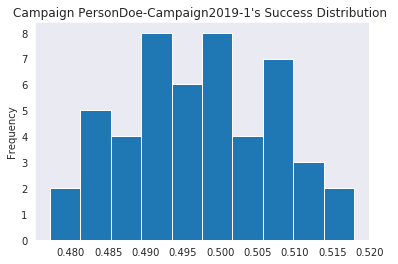

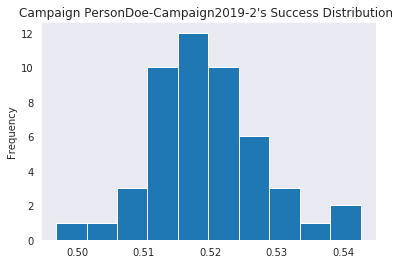

In [8]:
distribution_plot(campaign1['CTR'], 'PersonDoe-Campaign2019-1')
distribution_plot(campaign2['CTR'], 'PersonDoe-Campaign2019-2')

In [9]:
# Proportion Calculations
n1 = (campaign1['Impression'].sum() + campaign1['Click'].sum())
p1 = (campaign1['Click'] / n1).mean()

n2 = (campaign2['Impression'].sum() + campaign2['Click'].sum())
p2 = (campaign2['Click'] / n2).mean()

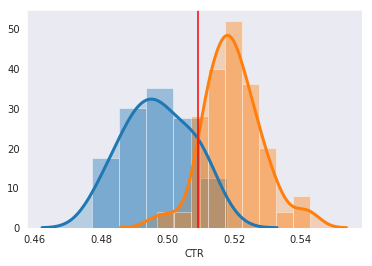

In [10]:
n_sampleEst = (1.96)**2 * p1 * (1-p1) * (1.96/.01)**2
n_sampleEst


sns.distplot( campaign1['CTR'], hist=True, kde=True, \
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(campaign2['CTR'], hist=True, kde=True,\
           kde_kws={'shade':True, 'linewidth':3})
plt.axvline(.509,color ='red')
plt.show()

In [11]:
n_sampleEst

1481.947387728444

With all that being said, we have two collected samples for both respective variants, seen in the DataFrame below.


## 3.3 Hypothesis

We say our "**level of significance**", $\alpha$, is set to be $\alpha = .05$. 

This significance level $\alpha$ is the probability of rejecting the null hypothesis $H_0$, when $H_0$ is true.

> Note: 1 - $\alpha$ is considered to be the confidence level, a term of probability of failing to reject the null $H_0$, when $H_0$ is true. This probability is stated intially, but should be avoided from use in the statement for it's altering perception of the test.


In [ ]:
#TODO throw away text?


And this is similar to asking is there a observed difference, in any direction, between two samples $\bar{p_1}$ and $\bar{x_2}$

After defining our hypothesis, we calculate the test statistic $t$.

In [12]:
alpha = 0.05

Our goal is to compare the means of two Ad groups and evaluate if there is a significant difference their average CTR performance. 

That is,

$H_0: \bar{p_1} - \bar{p_2} = 0$

> (i.e. There is no significant difference between the two campaigns)


$H_1: \bar{p_1} - \bar{p_2} \neq 0$

> (i.e. There is a significant difference between the two campaigns)

**Note:** We are not trying to prove that there is a significant differ. Rather, observing is this is the case. 

>The implication of being rewarded for proving something other than the existing process leads to the allusion of proving ones self right, when that's not the case--somewhat similar to the theme of driving a test with the confidence level from above.

In general, there are 3 types of hypotheses to consider in your tests, seen below

![Types of Test](../Resources/Images/two_tailed_test.png)

[Source](https://www.fromthegenesis.com/difference-between-one-tail-test-and-two-tail-test/)


## 3.4 Analyze The Results

Recall that our test statistic is using the $t$ statistic defined as 

$t= \tfrac{ \bar{p_1} - \bar{p_2} - 0 }{SE}$, 

where the standard error $SE = \sqrt{(\tfrac{\bar{p_1} (1-\bar{p_1})}{n_1}) + (\tfrac{\bar{p_2} (1-\bar{p_2})}{n_2})}$

> Note: When comparing between two groups, the notation $d:=\bar{p_1} - \bar{p_2}$ is introduced to simplify formula

Moreover, our degrees of freedom for these two variants is defined as $DoF := (n_1 + n_2 -2)$

We observe the difference $d$ = $\bar{p_1}$ & $\bar{p_2}$ equal to the following

In [79]:
d = p1-p2

print(d)

-0.00038801020408163293



And standard errors SE

In [34]:
# Standard Error of Proportions Calculations
## Term 1
se1 = (p1 * (1- p1))/n1

## Term 2
se2 = (p2 * (1- p2))/n2


## Terms being squared for final result
standardError = np.sqrt(se1 + se2)

In [80]:
print(f'Campaign {campaign1.Campaign[0]}\'s CTR: {round(p1,4)}' + f' with Standard Error {se1}.')
print(f'Campaign {campaign2.Campaign[3]}\'s CTR: {round(p2,4)}' + f' with Standard Error {se2}.\n')

print(f'T Statistic: {round(tStatistic, 2)}')

Campaign PersonDoe-Campaign2019-1's CTR: 0.0102 with Standard Error 6.325046591904657e-08.
Campaign PersonDoe-Campaign2019-2's CTR: 0.0106 with Standard Error 6.56249980467733e-08.

T Statistic: -1.08


In [35]:
print(f"The Standard Error is calculated as: {round(standardError,6)}")

The Standard Error is calculated as: 0.000359


Thereafter, we calculate or find our referred critical test statistic $t^*$, related to our problem statement.

Lastly, a conclusion would be made for this specific test.

In [36]:
# T test statistic

tStatistic = (d - 0) / standardError

In [93]:
# Critical T Value Test Statistic
criticalValue = scipy.stats.t.ppf(1.0 - alpha, df = (n1 + n2-2))


# Confidence Interval
confInt = [d - (criticalValue * standardError), d + (criticalValue * standardError)]

#Two Sided P Value, P( |t| >= |t^*|)

p_val = (1 - scipy.stats.t.cdf(abs(tStatistic), df \
                               = (n1 + n2-2)) ) * 2.0

In [95]:
print(f"Confidence Interval: {confInt}")

Confidence Interval: [-0.000978501683074716, 0.00020248127491145017]


In [96]:
print(f'We have critical value t^* at {round(criticalValue, 2)}\nand p-value of {round(p_val, 2)}')

We have critical value t^* at 1.64
and p-value of 0.28


## 3.5 Conclusions

If the calculated t-statistic $t$ > critical value $t^*$, then we reject the null hypothesis $H_0$, and accept the alternative hypothesis $H_1$. 
> Equivalently, if $p < \alpha$, then we  reject the null hypothesis $H_0$. 

If not, then we fail to reject the null hypothesis $H_0$. 

In [84]:
if p_val < alpha:
    print("We reject the Null Hypothesis H_0")
    print("Therefore, we can say that there is a statistical difference between the two campaigns.")

else:
    print("We fail to reject the Null Hypothesis H_0")
    print("Therefore, we can say that there is no statistical significant difference between the two campaigns.")


We fail to reject the Null Hypothesis H_0
Therefore, we can say that there is no statistical significant difference between the two campaigns.


p value discussion

practical significance

 you need to apply your subject area knowledge and expertise to determine whether the effect is big enough to be meaningful in the real world. In other words, is it large enough to care about?

Note: it false because conditions other than large effect sizes can produce tiny p-values.

Here’s how small effect sizes can still produce tiny p-values:

You have a very large sample size. As the sample size increases, the hypothesis test gains greater statistical power to detect small effects. With a large enough sample size, the hypothesis test can detect an effect that is so miniscule that it is meaningless in a practical sense.

The sample variability is very low. When your sample data have low variability, hypothesis tests can produce more precise estimates of the population’s effect. This precision allows the test to detect tiny effects.

Statistical significance indicates only that you have sufficient evidence to conclude that an effect exists. It is a mathematical definition that does not know anything about the subject area and what constitutes an important effect.

# 4.0 +More! [Optional]

## 4.1 The Chai -err umm....Chi-Squared Test

In [15]:
# df = [ [campaign1_Df['Clicks'].sum(), campaign1_Df['Impressions'].sum()- campaign1_Df['Clicks'].sum(),campaign1_Df['Impressions'].sum()], \
#       [campaign2_Df['Clicks'].sum(), campaign2_Df['Impressions'].sum() -campaign2_Df['Clicks'].sum(), campaign2_Df['Impressions'].sum()] ]

In [16]:
# from scipy import stats

# twoByTwo_df = pd.DataFrame(df,index=['Campaign 1', 'Campaign 2'] ,columns=['Clicks','No Clicks','Impressions'])
# # stats.chi2_contingency(twoByTwo_df)

In [17]:
# twoByTwo_df

In [18]:
# expectedClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['Clicks'].sum() 

# expectedNonClicksSeries = (twoByTwo_df['Impressions']/twoByTwo_df['Impressions'].sum()) * twoByTwo_df['No Clicks'].sum() 

# expectedDf = pd.concat([expectedClicksSeries,expectedNonClicksSeries],axis=1)

In [19]:
# expectedDf.columns =['Clicks', 'No Clicks']
# expectedDf


In [20]:
# chiSquareStatistic = ((twoByTwo_df[['Clicks','No Clicks']]-expectedDf)**2 / expectedDf).values.sum()

In [21]:
# ((twoByTwo_df[['Clicks','No Clicks']]-expectedDf)**2 / expectedDf).values.sum()

In [22]:
# chiSquareStat, pVal, dof, expected = stats.chi2_contingency(twoByTwo_df)

# print('Expected Table: \n',expected,'\n')

# # interpret test-statistic
# prob = 0.95
# alpha = 1.0 - prob

# criticalVal = stats.chi2.ppf(prob, dof)

# print(f'Degrees of Freedom: {dof}\n')
# print('probability=%.2f, critical=%.2f, stat=%.2f \n' % (prob, criticalVal, alpha))

# print('Decision:')
# print(f'For significance level {round(alpha,2)},\n')
# if abs(chiSquareStat) >= criticalVal:
#     print('We reject the Null Hypothesis, H_0\n')
#     print(f'for p = {prob} >= {criticalVal}.')
# else:
#     print('We fail to reject the Null Hypothesis, H_0\n')
#     print(f'for p = {prob} < {criticalVal}.')

    
# ### Alternatively can say:    
# # if p <= alpha:
# #     print('We reject the Null Hypothesis, H_0.')
# #     print(f'for p = {p} >= {alpha}.')

# # else:
# #     print('We fail to reject the Null Hypothesis, H_0.')
# #     print(f'for p = {p} < {alpha}.')

# 5.0 Remarks & Random Notes

Prerequisite knowledge: Central Limit Theorem
The Central Limit Theorem (CLT) implies a sample of independent random variables, their sums tends towards to a normal distribution even if the original variables themselves aren't normally distributed, also the sample mean tends towards to a normal distribution (sum and mean are equivalent).



## 5.1 Chi Square Testing

* Chi-Square Goodness of Fit Test
    * $\chi^2$ Test that determines if a sample data matches a population. For more details on this type, see: Goodness of Fit Test.

* Chi-Square Test for Independence

    * $\chi^2$ Test that compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
    
> Note: Chi Square is cool because it works with more than 2 samples

> Note: If we have a  small sample size, then Chi Square may have more errors, and thus one would have to work with a Fischer's Exact Test

## 5.2 Testing considerations

* Ethics
    * Risk, Benefits, and Privacy for participants
    
* Hyperfocusing on specific metric selections, rather than macro ones. (e.g. Wanting to increase Revenue is a goal, but what is the specific issue that you are tackling, to downstream speaking increase that)

* If you test on a smaller sample, realize test will have lower power, and thus is constrainted for detecting larger impacts 

* Keep in mind
    * when is the best time to run the experiment (e.g. running on Holidays, weekends?)
    * If there is a new change, there may be a learning effect, and then behaviour can become stable again (leading to a false positive)
        * Recommendation to avoid a Learning Effect is running experiment on smaller group of users, for longer period of time.
* Mind the possibility of the Simpson's Paradox
    * Segmentation of groups in thus reducing sampling creates significance, but not from other groups from data before segmentation. Best way to validate this doesn't exist is to do the same test for combined groups.
        * E.g. Splitting between new users and existing users
* $\alpha$ percent of the time, you'll reach significance due to chance 
    * You are running a tests with 20 variants, and you test each hypothesis separately:
        * P(one significant result) = 1−P(no significant results) 
        * P(one significant result) = 1−(1−0.05)^20 = 0.64
    * Avoid this by the Bonferroni Correction
    
* Novelty Effect or Change Aversion: cohort analysis may be helpful.



> Note: Individuals will proceed to perform an A/B test from code. Though note there exists **proprietary** A/B testing solutions like [Optimizely](https://www.optimizely.com/), [VWO](https://vwo.com/campaign/get-started/?utm_source=google&utm_medium=paid&utm_campaign=mof_search_brand_vwo_brand&utm_content=308583203468&utm_term=vwo&gclid=Cj0KCQjwv8nqBRDGARIsAHfR9wD7uaDnZRUDFKrXDtcn8jCv4v_dNhSRxzWsddKQAo0WuREO4phZ1PQaAopsEALw_wcB), [AB Tasty](https://www.abtasty.com/), [Google Optimize](https://optimize.google.com/optimize/home/), etc.

<a id='appendix'></a>

## 5.3 Appendix

### P-Hacking


### Tukey's Range Test (Optional) [WIP]

### 5.3.1 Data Collection Section

#### 5.3.1.1 Uniform Distribution

In [20]:
n = 400
uniformDist = np.random.rand(n)
# [0.0, 1.0) distribution set

In [27]:
print(uniformDist[:4])

[0.03403842 0.84005661 0.5416037  0.15702651]


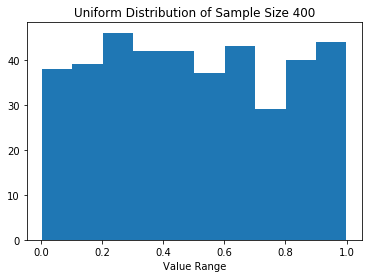

In [23]:
plt.hist(uniformDist)
plt.title(f'Uniform Distribution of Sample Size {n}')
plt.xlabel('Frequency')
plt.xlabel('Value Range')
plt.show()

#### 5.3.1.2 Standard Normal Distribution

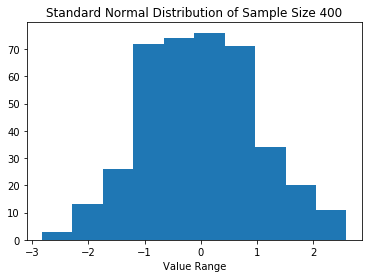

In [26]:
normalDist = np.random.randn(n)
# Mean 0 and Variance 1 Distribution Set
print(uniformDist[:4])

plt.hist(normalDist)
plt.title(f'Standard Normal Distribution of Sample Size {n}')
plt.xlabel('Frequency')
plt.xlabel('Value Range')
plt.show()

#### 5.3.2.2 Proportion: Normal Approximation

For large values of n, the distributions of the count $X$ and the sample proportion are approximately normal due to the Central Limit Theorem, as it approximates the normal distribution like 

$\bar{X}$ ~ $N(\tfrac{np}{p},\tfrac{np(1-p)}{n^2}) = N(n, \tfrac{p(1-p)}{n})$

<a id='appendix-chi-square-test'></a>

### Chi Square Test (Optional)
Equivalently, we can use a similiar process and test statistic in evaluation of proportions. 

Let us have a 2x2 frequency table where columns are two groups of respondents and rows are the two responses "successes" and "failures". 


|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | X_1    | Y_1         | X_1 + Y_1  | 
| Test 2 | X_2    | Y_2         | X_2 + Y_2   |
| Total  | x      | x           | x   | 

Then we can provide an equivalent A/B test for the upcoming CTR metric as followed:


State the Hypothesis:

$H_0: \bar{p_1} - \bar{p_2} = 0$ (Independent)

$H_1: \bar{p_1} - \bar{p_2} \neq 0$ (Not Independent)

DF = $(x_1 - 1) * (x_2 - 1)$

Test Statistic:

$\chi^2= \tfrac{(O-E)^2}{E}$, 

where $O$ are the Observed values and $E$ are the Expected values.

> Note:
Expected values are calculated as such:
> For the top left region, it would be $\tfrac{( x_{Clicks} * (X_1 + Y_1)}{x_T }$

|    _    | Clicks | No Clicks | Total (Impressions) |
|--------|--------|-------------|-----|
| Test 1 | $Y_1$    | $Y_1$         | $X_1 + Y_1$  | 
| Test 2 | $X_2 $   | $Y_2 $        | $X_2 + Y_2 $  |
| Total  | $x_{Clicks}$      | $x_{No Clicks}$        | $x_T$   | 

### 5.3.3 Data Collection Section

#### 5.3.3.1 Basesline Conversion Rate

Known in conversion-related AB testing calcilatsion, **baseline conversion rate** is the current conversion rate for the variant you’re testing.

> Conversion rate is the number of conversions divided by the total number of visitors.

## Definitions & Terminology

* Null Hypothesis


* Alternative Hypthesis


![Null Hypothesis Comment](../Resources/Images/null_hypothesis_xkcd.png)

[Source](https://xkcd.com/892/)

* "Test of Proportion" is also seen as the 2-sample independent t-test

* Standard Deviation

* Mean 

* Variance

* Bi-modal

* Signifiance

* P-value

* Chi = $\chi^2$

* Central Limit Theorem: Sample of independent random variables from an unknown population that is non-normal. This sample's mean tends towards to a normal distribution, as the size $n$ becomes larger

* Normal

* Standard Normal

# 6.0 Resources

* https://byrony.github.io/understanding-ab-testing-and-statistics-behind.html
    
* https://www.dataquest.io/blog/a-b-testing-the-definitive-guide-to-improving-your-product/

* https://docs.google.com/presentation/d/1k_zR5IkHaIpA6fbTDoa48Gh_LodY7Mjbf56zLro5Uus/edit#slide=id.g31d3c8507d_0_177
        
        
* https://stats.stackexchange.com/questions/76875/what-is-the-difference-between-mcnemars-test-and-the-chi-squared-test-and-how/141450#141450